In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_fnie = pd.read_csv("FNA08_foreign_nationals_in_employment.csv")# fnie = foreign nationals in employment

In [3]:
df_fnie.head()

,Statistic Label,Broad Nationality Group,Sex,Industry Sector NACE Rev 2,Year,UNIT,VALUE
0,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2005,Number,5116.0
1,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2006,Number,6032.0
2,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2007,Number,6705.0
3,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2008,Number,6863.0
4,Foreign Nationals in Employment,All nationalities,Both sexes,"Agriculture, forestry and fishing (A)",2009,Number,6154.0


In [4]:
print("CHECKING the shape: ",df_fnie.shape)#Checking shape
print("\n CHECKING NULL values :\n",df_fnie.dtypes)#checking data types
#print("\n Check info:\n",df_fnie.info)# checking info
print("\n COUNT is :\n",df_fnie.count() )#count rows
print("\n CHECKING NULL values :\n",df_fnie.isnull().sum())#checking null values

CHECKING the shape:  (6762, 7)

 CHECKING NULL values :
 Statistic Label                object
Broad Nationality Group        object
Sex                            object
Industry Sector NACE Rev 2     object
Year                            int64
UNIT                           object
VALUE                         float64
dtype: object

 COUNT is :
 Statistic Label               6762
Broad Nationality Group       6762
Sex                           6762
Industry Sector NACE Rev 2    6762
Year                          6762
UNIT                          6762
VALUE                         6401
dtype: int64

 CHECKING NULL values :
 Statistic Label                 0
Broad Nationality Group         0
Sex                             0
Industry Sector NACE Rev 2      0
Year                            0
UNIT                            0
VALUE                         361
dtype: int64


In [5]:
df_fnie.drop(['Statistic Label', 'UNIT'], axis=1,inplace=True)

In [6]:
df_fnie.rename(columns = {'Broad Nationality Group':'nationality_group','VALUE':'value','Sex':'sex',
                          'Industry Sector NACE Rev 2':'field_of_study','Year':'year'}, 
                            inplace = True) #Changing column names

In [7]:
df_fnie["value"].fillna(0, inplace = True)

In [8]:
print("CHECKING NULL in column value :",df_fnie['value'].isnull().sum())#checking null values

CHECKING NULL in column value : 0


In [9]:
df_fnie['value'] = df_fnie['value'].astype(int) # changing type to int

In [10]:
from sklearn.preprocessing import LabelEncoder

cols = ['nationality_group', 'sex', 'field_of_study']# cloumns to encode

df_fnie[cols] = df_fnie[cols].apply(LabelEncoder().fit_transform)# apply encoder before using model

In [11]:
df_fnie.head()

,nationality_group,sex,field_of_study,year,value
0,0,0,4,2005,5116
1,0,0,4,2006,6032
2,0,0,4,2007,6705
3,0,0,4,2008,6863
4,0,0,4,2009,6154


In [12]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = df_fnie.iloc[:, :-1].values               # All features (independent varaibles) except MEDV 
y = df_fnie['value'].values                    # Target variable

# Split the data into 70% and 30% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6762, 4), (6762,), (4733, 4), (2029, 4), (4733,), (2029,))

In [13]:
df_fnie.head()

,nationality_group,sex,field_of_study,year,value
0,0,0,4,2005,5116
1,0,0,4,2006,6032
2,0,0,4,2007,6705
3,0,0,4,2008,6863
4,0,0,4,2009,6154


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 8, random_state = 10)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=500,
                      random_state=10)

In [15]:
y_pred = rf.predict(X_test)

In [16]:
y_pred

array([62687.91569801,   838.63073816,   850.7269632 , ...,
         407.01929327,  2815.48977113,  1252.65846113])

In [17]:
from sklearn.metrics import r2_score

print("Accuracy:",r2_score(y_test,y_pred))


Accuracy: 0.906250281357968


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

st_train_x = sc.fit_transform(X_train)
st_test_x = sc.transform(X_test)

In [19]:
y_train

array([   28,   656,   923, ...,     0, 10833,   794])

In [20]:
from sklearn.svm import SVR
from sklearn import metrics

# Initialize model
svr_model = SVR(kernel='rbf',shrinking=False,C = 2, gamma = 0.2,epsilon=0.2)

# Train the model by calling a method fit()
svr_model.fit(X_train, y_train)

Y_pred_train = svr_model.predict(X_test)

print('Accuracy in SVR train is: ',metrics.mean_squared_error(y_test, Y_pred_train))
print('Accuracy in SVC = ', round(metrics.r2_score(y_test, Y_pred_train)*100,2))
#scores_regr = metrics.mean_squared_error(y_true, y_pred)

Accuracy in SVR train is:  702251750.9691151
Accuracy in SVC =  -4.81


In [134]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 2,3],'gamma': [0.1,0.2,0.3,0.4],'epsilon':[0.1,0.2,0.3,0.4]}
model_svr = SVR()
gs_cv = GridSearchCV(model_svr, parameters,cv=5,refit='r2',verbose=4)
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=-0.057 total time=   0.2s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=-0.055 total time=   0.2s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=-0.038 total time=   0.2s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=-0.061 total time=   0.2s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   0.3s
[CV 2/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.054 total time=   0.3s
[CV 3/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.3s
[CV 5/5] END C=1.5, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-0.048 total time=   0.3s
[CV 1/5] END C=1.5, epsilon=0.1, 

[CV 1/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=linear;, score=-0.057 total time=   0.2s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=linear;, score=-0.055 total time=   0.2s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=linear;, score=-0.038 total time=   0.2s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=linear;, score=-0.061 total time=   0.2s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=rbf;, score=-0.056 total time=   0.3s
[CV 2/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=rbf;, score=-0.054 total time=   0.3s
[CV 3/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=rbf;, score=-0.063 total time=   0.3s
[CV 5/5] END C=1.5, epsilon=0.3, gamma=0.2, kernel=rbf;, score=-0.048 total time=   0.3s
[CV 1/5] END C=1.5, epsilon=0.3, gamma=0.3, kernel=linear;, score=-0.057 total time=   0.2s
[CV

[CV 2/5] END C=2, epsilon=0.1, gamma=0.3, kernel=linear;, score=-0.054 total time=   0.2s
[CV 3/5] END C=2, epsilon=0.1, gamma=0.3, kernel=linear;, score=-0.038 total time=   0.2s
[CV 4/5] END C=2, epsilon=0.1, gamma=0.3, kernel=linear;, score=-0.061 total time=   0.2s
[CV 5/5] END C=2, epsilon=0.1, gamma=0.3, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=2, epsilon=0.1, gamma=0.3, kernel=rbf;, score=-0.056 total time=   0.3s
[CV 2/5] END C=2, epsilon=0.1, gamma=0.3, kernel=rbf;, score=-0.054 total time=   0.3s
[CV 3/5] END C=2, epsilon=0.1, gamma=0.3, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=2, epsilon=0.1, gamma=0.3, kernel=rbf;, score=-0.063 total time=   0.3s
[CV 5/5] END C=2, epsilon=0.1, gamma=0.3, kernel=rbf;, score=-0.048 total time=   0.3s
[CV 1/5] END C=2, epsilon=0.1, gamma=0.4, kernel=linear;, score=-0.057 total time=   0.2s
[CV 2/5] END C=2, epsilon=0.1, gamma=0.4, kernel=linear;, score=-0.054 total time=   0.2s
[CV 3/5] END C=2, epsilon

[CV 5/5] END C=2, epsilon=0.3, gamma=0.4, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=2, epsilon=0.3, gamma=0.4, kernel=rbf;, score=-0.056 total time=   0.3s
[CV 2/5] END C=2, epsilon=0.3, gamma=0.4, kernel=rbf;, score=-0.054 total time=   0.3s
[CV 3/5] END C=2, epsilon=0.3, gamma=0.4, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=2, epsilon=0.3, gamma=0.4, kernel=rbf;, score=-0.063 total time=   0.3s
[CV 5/5] END C=2, epsilon=0.3, gamma=0.4, kernel=rbf;, score=-0.048 total time=   0.4s
[CV 1/5] END C=2, epsilon=0.4, gamma=0.1, kernel=linear;, score=-0.057 total time=   0.2s
[CV 2/5] END C=2, epsilon=0.4, gamma=0.1, kernel=linear;, score=-0.054 total time=   0.2s
[CV 3/5] END C=2, epsilon=0.4, gamma=0.1, kernel=linear;, score=-0.038 total time=   0.2s
[CV 4/5] END C=2, epsilon=0.4, gamma=0.1, kernel=linear;, score=-0.061 total time=   0.2s
[CV 5/5] END C=2, epsilon=0.4, gamma=0.1, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=2, epsilon

[CV 3/5] END C=3, epsilon=0.2, gamma=0.1, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=3, epsilon=0.2, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.3s
[CV 5/5] END C=3, epsilon=0.2, gamma=0.1, kernel=rbf;, score=-0.048 total time=   0.3s
[CV 1/5] END C=3, epsilon=0.2, gamma=0.2, kernel=linear;, score=-0.057 total time=   0.2s
[CV 2/5] END C=3, epsilon=0.2, gamma=0.2, kernel=linear;, score=-0.054 total time=   0.2s
[CV 3/5] END C=3, epsilon=0.2, gamma=0.2, kernel=linear;, score=-0.038 total time=   0.2s
[CV 4/5] END C=3, epsilon=0.2, gamma=0.2, kernel=linear;, score=-0.060 total time=   0.2s
[CV 5/5] END C=3, epsilon=0.2, gamma=0.2, kernel=linear;, score=-0.047 total time=   0.2s
[CV 1/5] END C=3, epsilon=0.2, gamma=0.2, kernel=rbf;, score=-0.055 total time=   0.3s
[CV 2/5] END C=3, epsilon=0.2, gamma=0.2, kernel=rbf;, score=-0.054 total time=   0.3s
[CV 3/5] END C=3, epsilon=0.2, gamma=0.2, kernel=rbf;, score=-0.039 total time=   0.3s
[CV 4/5] END C=3, epsilon=0.

KeyboardInterrupt: 

In [135]:
print("Best params founded are : ", gs_cv.best_params_)
print("Best_estimators founded are : ",gs_cv.best_estimator_)
print("Best score founded is: ",gs_cv.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

## OVERFITTING or Underfitting ==> get the variance to show overfitting if is HIGH !! 
## UNERFITTING when there's a HIGH Bias

In [ ]:
def draw_boxplot(column,x_label,y_label):
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.add_subplot(111)

    ax.boxplot(column, vert=False, manage_ticks=True,boxprops=dict(color='red'))
    ax.set_xlabel(x_label)
    ax.set_yticks([1])
    ax.set_yticklabels([y_label])

    quantiles = np.quantile(column, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
    ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
              color='b', ls=':', lw=0.5, zorder=0)
    ax.set_ylim(0.5, 1.5)
    ax.set_xticks(quantiles)
    plt.show()

In [ ]:
def draw_histogram(column,color_bar,color_border,):
    sns.distplot(column, hist=True, kde=True, 
             bins=int(180/5), color = color_bar, 
             hist_kws={'edgecolor':color_border},
             kde_kws={'linewidth': 4});

In [ ]:
from scipy import stats
print('variance of year',np.var(df_aofm['year']))
print('variance of average_year',np.var(df_aofm['average_age']))


m = stats.mode(df_aofm['average_age'])
print(m)

## Visualize data using heatmap

<Axes: >

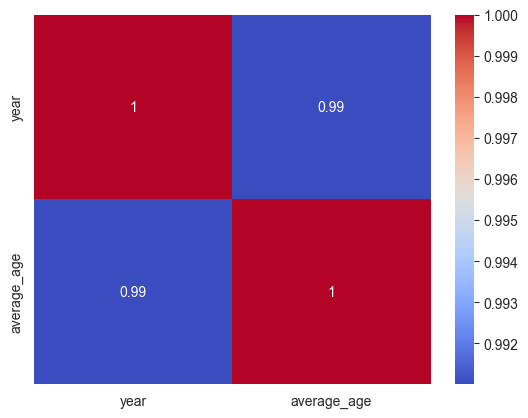

In [11]:
cols = ["year",'average_age']
coef_heat = np.corrcoef(df_aofm[cols].values.T)
sns.heatmap(coef_heat,cmap="coolwarm",yticklabels=cols,xticklabels=cols,annot=True,cbar=True)

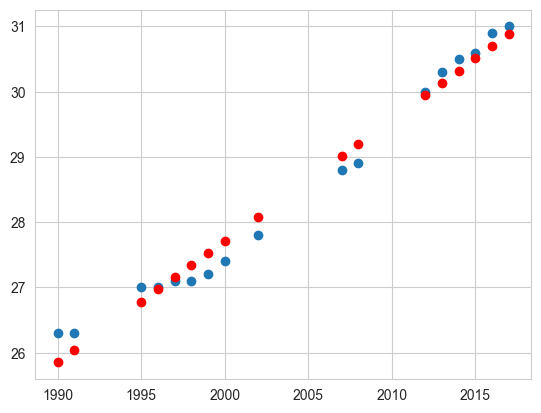

In [16]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train,color='red')

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred_train,color='red')

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 2,3],'gamma': [0.1,0.2,0.3,0.4],'epsilon':[0.1,0.2,0.3,0.4]}
model_svr = SVR()
gs_cv = GridSearchCV(model_svr, parameters,cv=5,refit='r2',verbose=4)
gs_cv.fit(X_train, y_train)


In [ ]:
print("Best params founded are : ", gs_cv.best_params_)
print("Best_estimators founded are : ",gs_cv.best_estimator_)
print("Best score founded is: ",gs_cv.best_score_)

## IMPROVE CODING usinf FOR with LAbelEncoder

In [ ]:
for c in x_train_full.columns:
    if x_train_full[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train_full[c].values))
        x_train_full[c] = lbl.transform(list(x_train_full[c].values))
        # x_train_full.drop(c,axis=1,inplace=True)

for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values))
        x_test[c] = lbl.transform(list(x_test[c].values))
        # x_test.drop(c,axis=1,inplace=True)

## OVERFITTING or Underfitting ==> get the variance to show overfitting if is HIGH !! 
## UNERFITTING when there's a HIGH Bias